<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/6WeekTask/Clustering_Model_For_Hasil_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

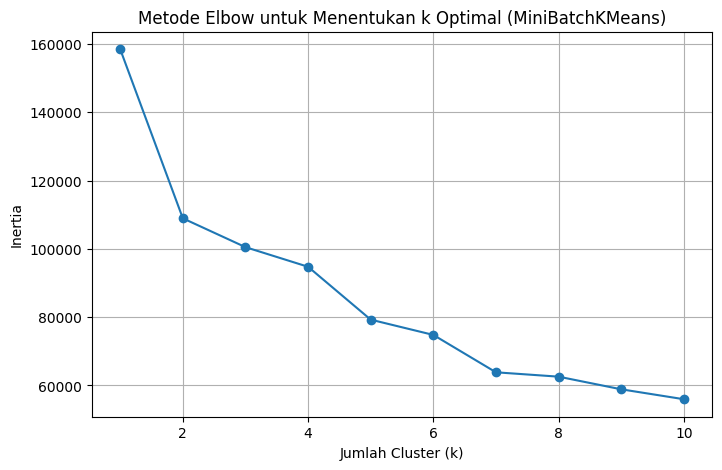

Hasil clustering disimpan dalam 'hasil_clustering.csv'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

# Masukin Dataset
file_path = '/content/sample_data/clusteringweek06.csv'
data = pd.read_csv(file_path)

# Standarisasi data untuk memastikan semua fitur berada pada skala yang sama
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Menggunakan MiniBatchKMeans untuk menentukan jumlah cluster optimal (Metode Elbow)
inertia = []  # Daftar untuk menyimpan nilai inertia dari setiap k
k_range = range(1, 11)  # Rentang jumlah cluster yang akan diuji

# Loop untuk menghitung inertia untuk setiap jumlah cluster k
for k in k_range:
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    mini_kmeans.fit(data_scaled)
    inertia.append(mini_kmeans.inertia_)  # Menyimpan inertia dari model

# Plot grafik Elbow untuk menemukan titik optimal
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')  # Menampilkan grafik k vs inertia
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal (MiniBatchKMeans)')
plt.grid(True)
plt.show()

# Pilih nilai k optimal berdasarkan grafik Elbow
optimal_k = 4  # Sesuaikan dengan hasil observasi dari grafik Elbow

# Menerapkan MiniBatchKMeans dengan jumlah cluster optimal
final_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
final_clusters = final_kmeans.fit_predict(data_scaled)  # Menyimpan hasil cluster untuk setiap data

# Menambahkan hasil clustering ke dalam DataFrame asli
data['Cluster'] = final_clusters

# Simpan hasil clustering ke file baru
data.to_csv('hasil_clustering.csv', index=False)
print("Hasil clustering disimpan dalam 'hasil_clustering.csv'")
